In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

## Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import time
from models.ffnn import FFNN

## Load Dataset

In [3]:
print("Downloading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.astype(float)
y = y.astype(int)

## Preprocessing

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
X = X / 255.0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

In [8]:
input_size = 784
hidden_sizes = [64] 
output_size = 10

## Experiment 1
Weight Initializer: Zero


Training custom FFNN model...
Epoch 1/10, Train Loss: 2.3017
Epoch 2/10, Train Loss: 2.3013
Epoch 3/10, Train Loss: 2.3013
Epoch 4/10, Train Loss: 2.3013
Epoch 5/10, Train Loss: 2.3013
Epoch 6/10, Train Loss: 2.3013
Epoch 7/10, Train Loss: 2.3013
Epoch 8/10, Train Loss: 2.3013
Epoch 9/10, Train Loss: 2.3013
Epoch 10/10, Train Loss: 2.3013
Custom FFNN training time: 19.31 seconds
Accuracy: 0.11428571428571428


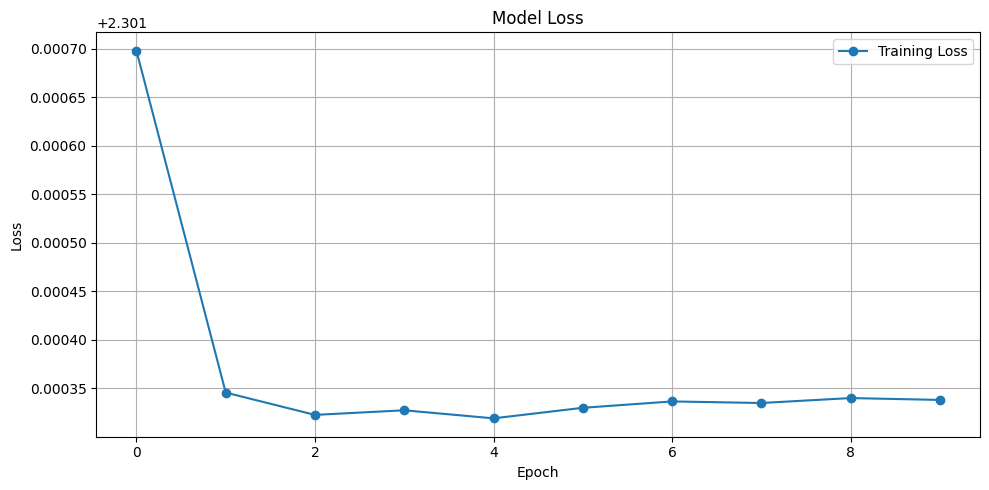

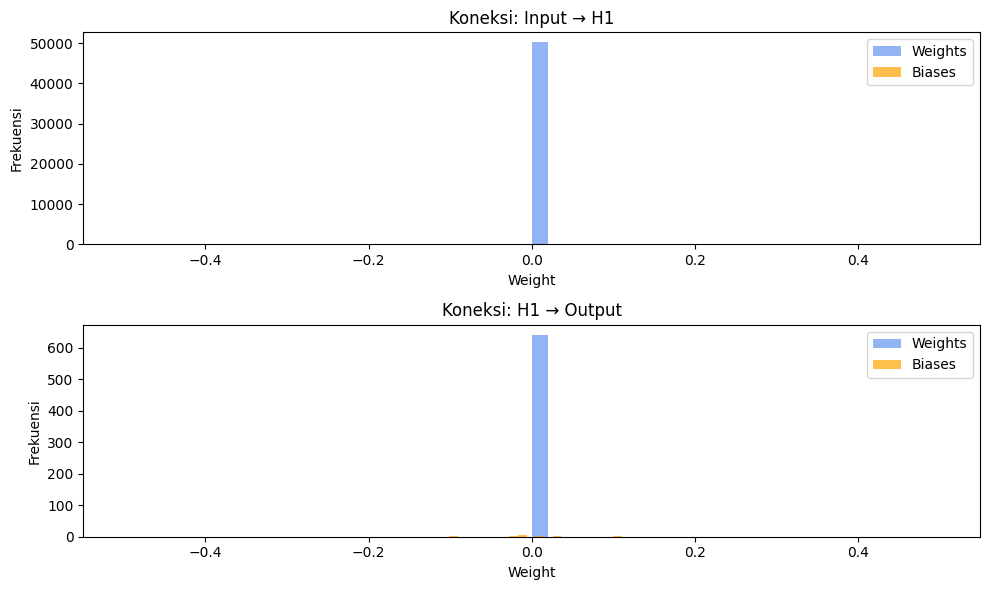

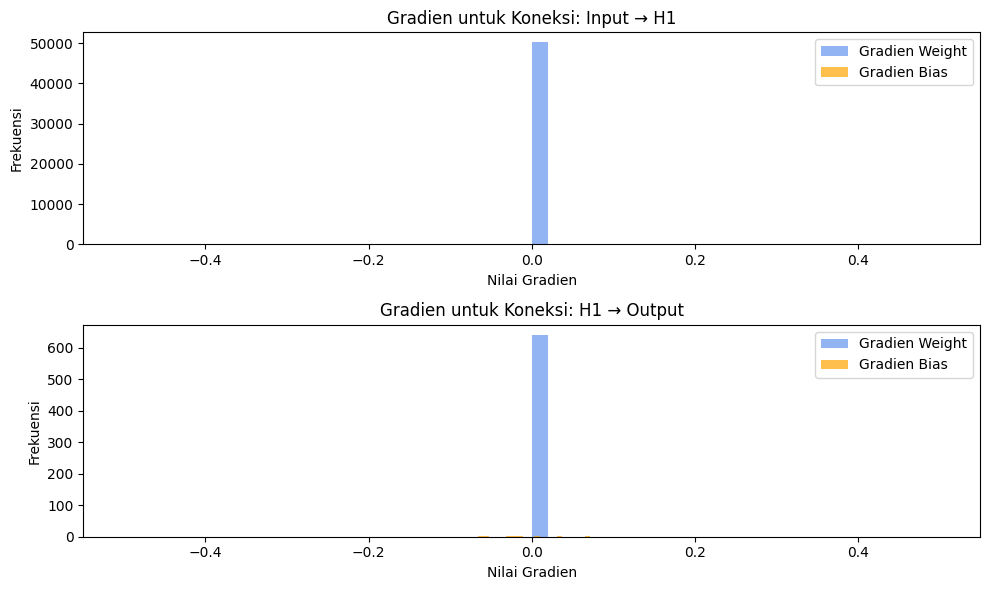

In [9]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='zero'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 2
Weight Initializer: Uniform


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.7963
Epoch 2/10, Train Loss: 0.3878
Epoch 3/10, Train Loss: 0.3442
Epoch 4/10, Train Loss: 0.3242
Epoch 5/10, Train Loss: 0.3118
Epoch 6/10, Train Loss: 0.3027
Epoch 7/10, Train Loss: 0.2964
Epoch 8/10, Train Loss: 0.2913
Epoch 9/10, Train Loss: 0.2868
Epoch 10/10, Train Loss: 0.2834
Custom FFNN training time: 20.93 seconds
Accuracy: 0.9145714285714286


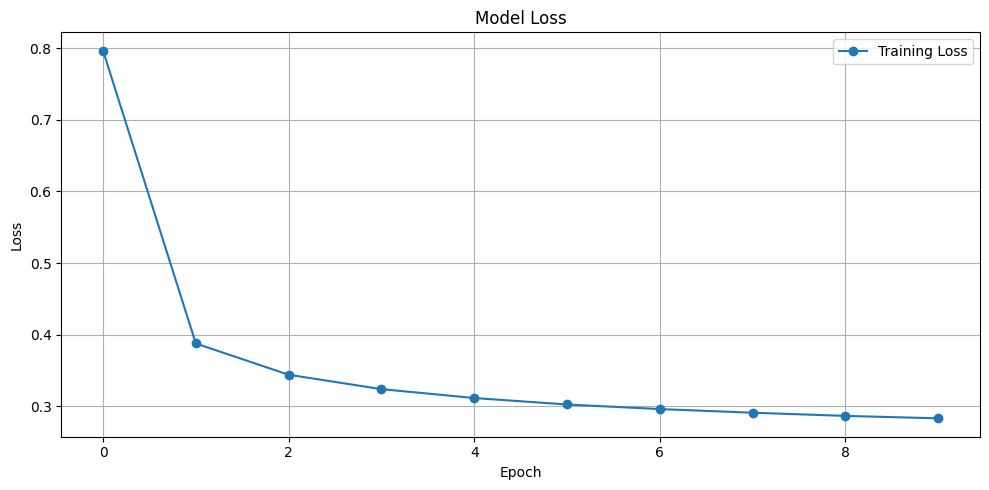

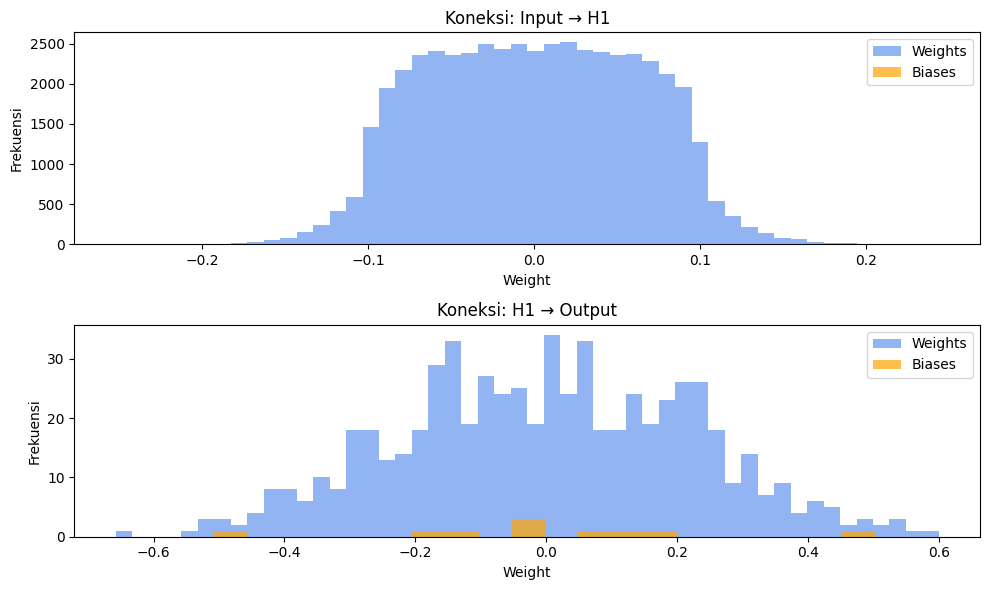

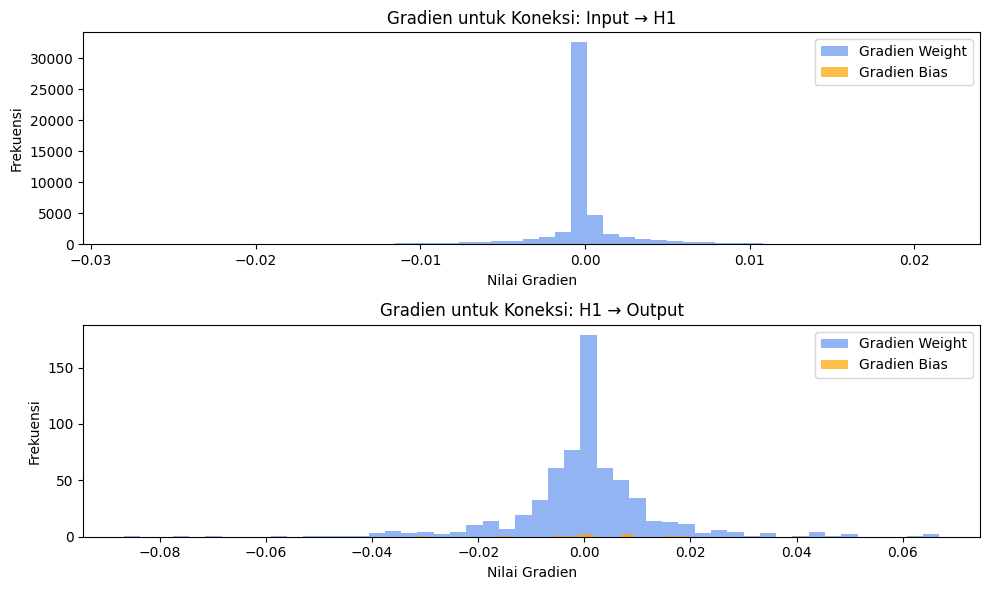

In [10]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='uniform'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 3
Weight Initializer: Normal


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.9833
Epoch 2/10, Train Loss: 0.4731
Epoch 3/10, Train Loss: 0.4099
Epoch 4/10, Train Loss: 0.3792
Epoch 5/10, Train Loss: 0.3606
Epoch 6/10, Train Loss: 0.3485
Epoch 7/10, Train Loss: 0.3391
Epoch 8/10, Train Loss: 0.3320
Epoch 9/10, Train Loss: 0.3264
Epoch 10/10, Train Loss: 0.3210
Custom FFNN training time: 14.79 seconds
Accuracy: 0.908


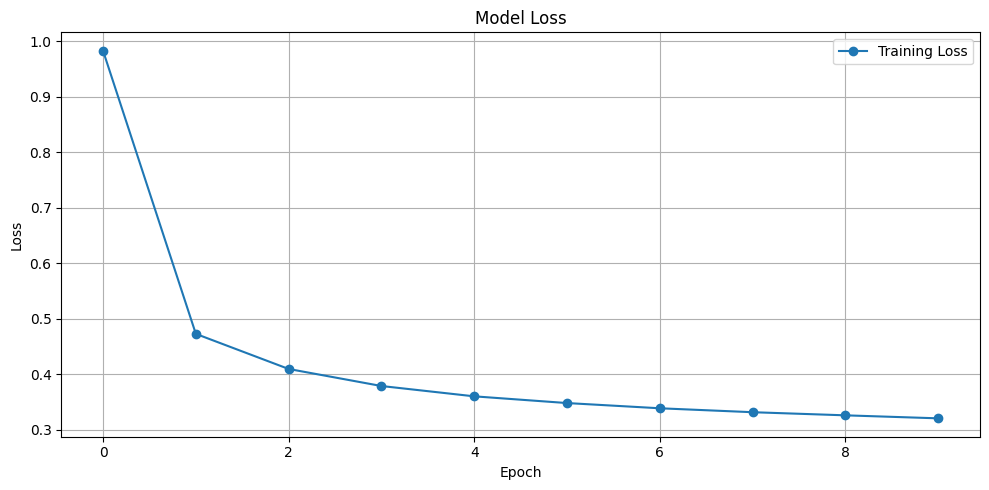

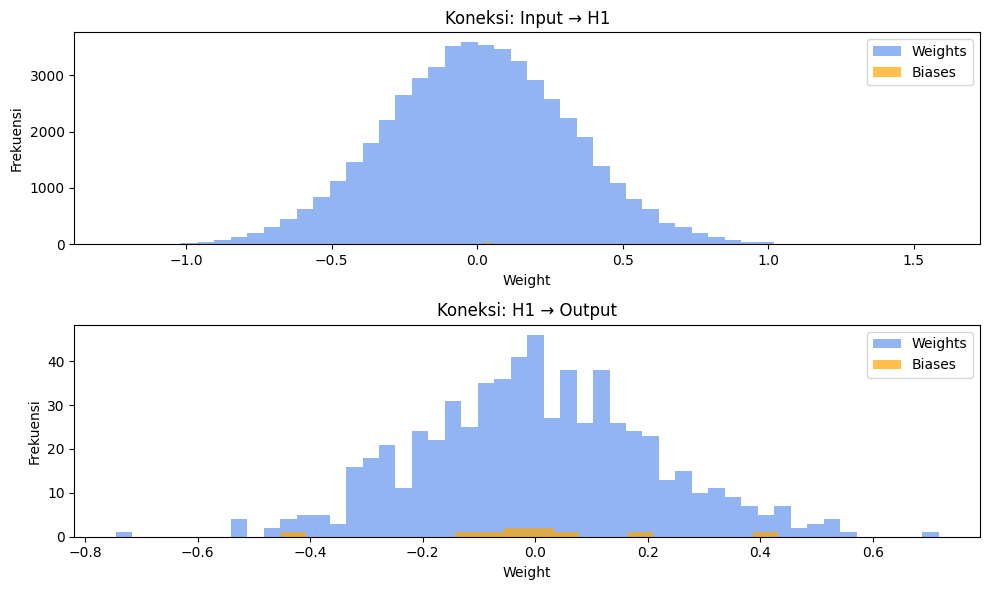

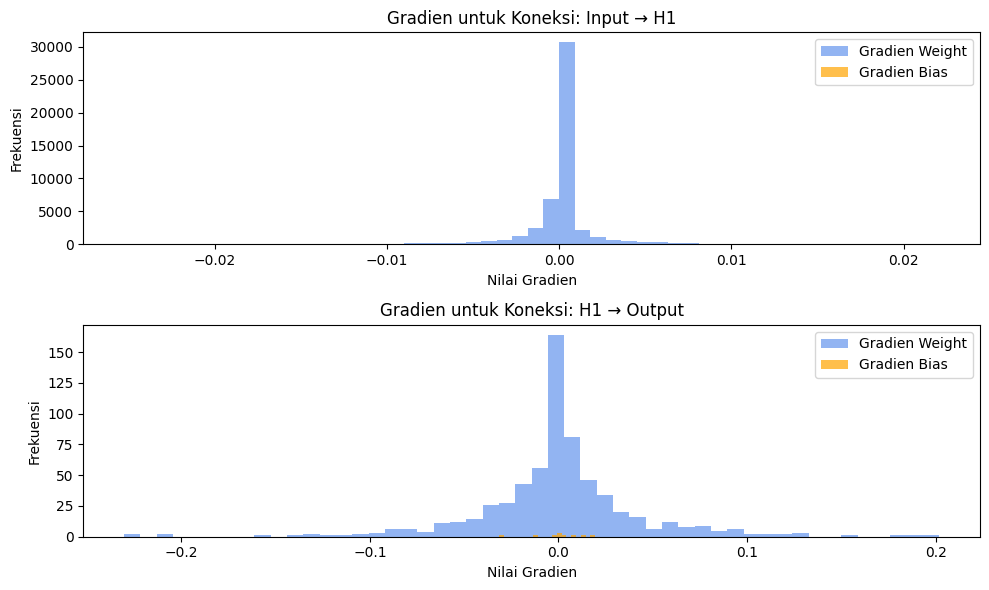

In [11]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='normal'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 4
Weight Initializer: Xavier


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.5919
Epoch 2/10, Train Loss: 0.3583
Epoch 3/10, Train Loss: 0.3258
Epoch 4/10, Train Loss: 0.3098
Epoch 5/10, Train Loss: 0.2995
Epoch 6/10, Train Loss: 0.2924
Epoch 7/10, Train Loss: 0.2870
Epoch 8/10, Train Loss: 0.2826
Epoch 9/10, Train Loss: 0.2790
Epoch 10/10, Train Loss: 0.2762
Custom FFNN training time: 13.75 seconds
Accuracy: 0.9175


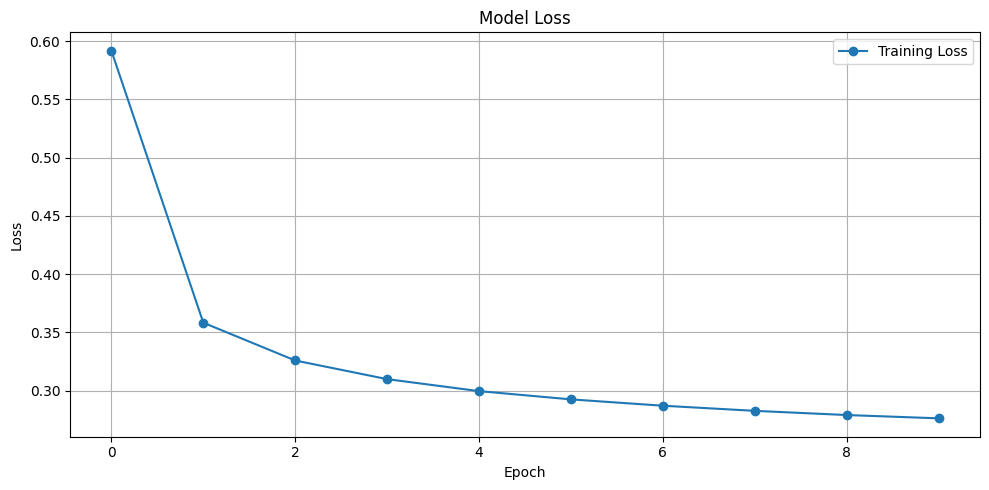

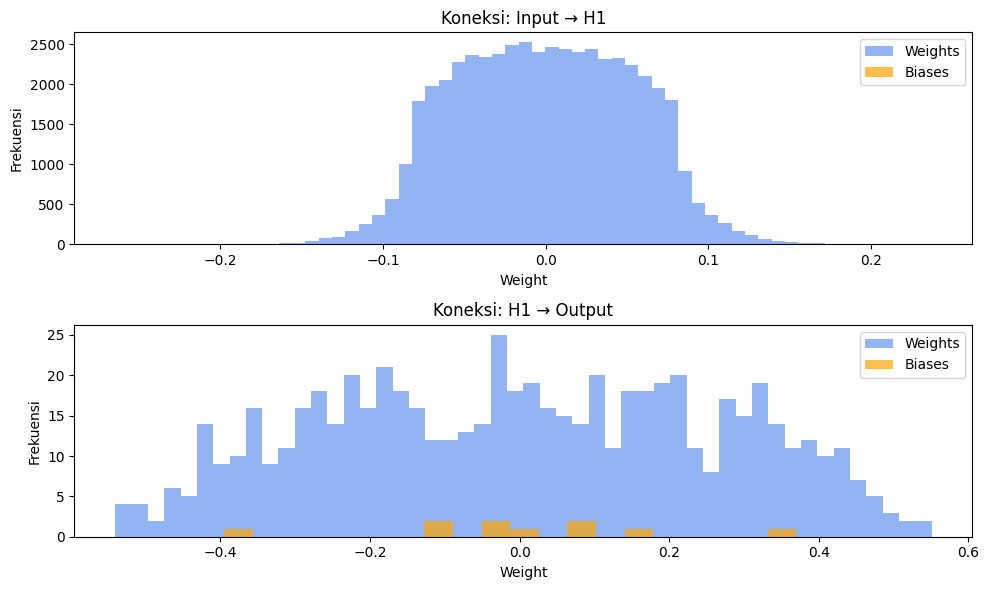

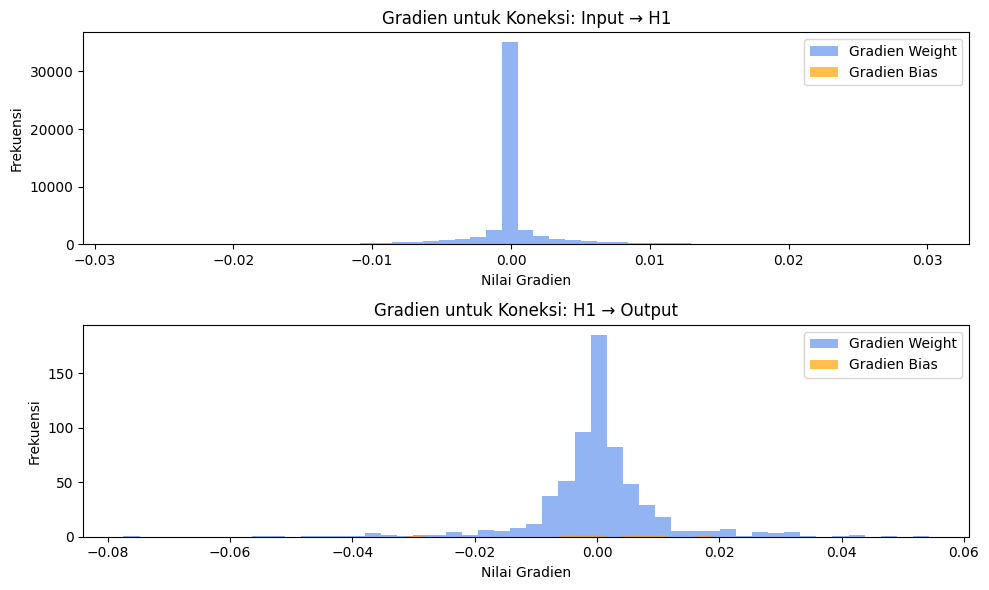

In [12]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='xavier'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 5
Weight Initializer: He


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.5822
Epoch 2/10, Train Loss: 0.3561
Epoch 3/10, Train Loss: 0.3246
Epoch 4/10, Train Loss: 0.3093
Epoch 5/10, Train Loss: 0.2991
Epoch 6/10, Train Loss: 0.2923
Epoch 7/10, Train Loss: 0.2870
Epoch 8/10, Train Loss: 0.2828
Epoch 9/10, Train Loss: 0.2788
Epoch 10/10, Train Loss: 0.2758
Custom FFNN training time: 16.40 seconds
Accuracy: 0.9196428571428571


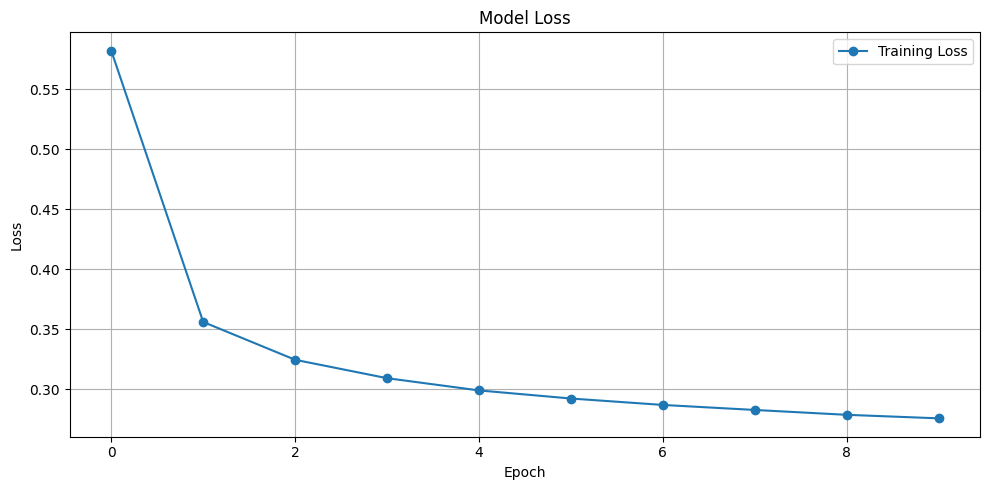

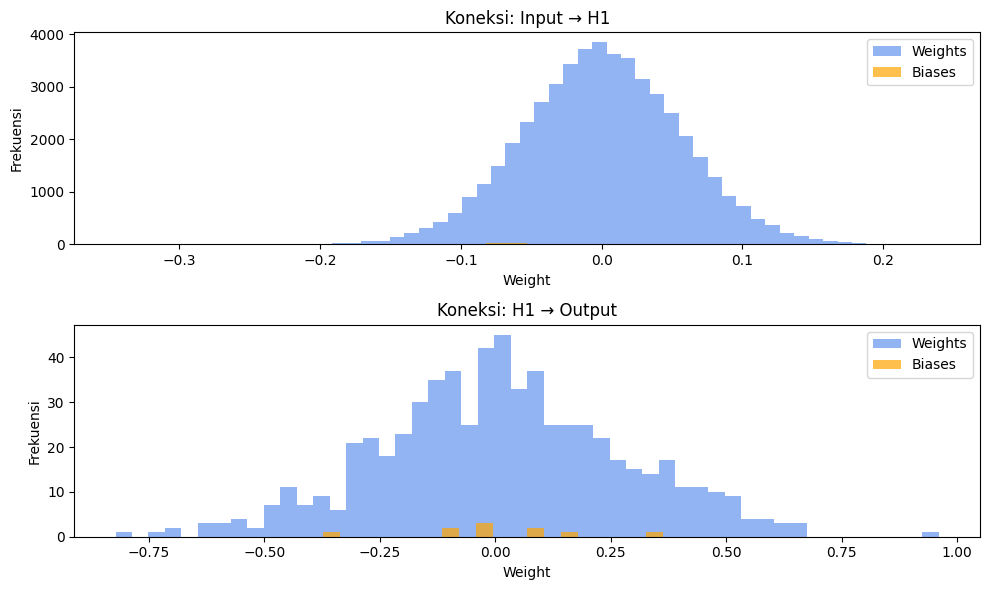

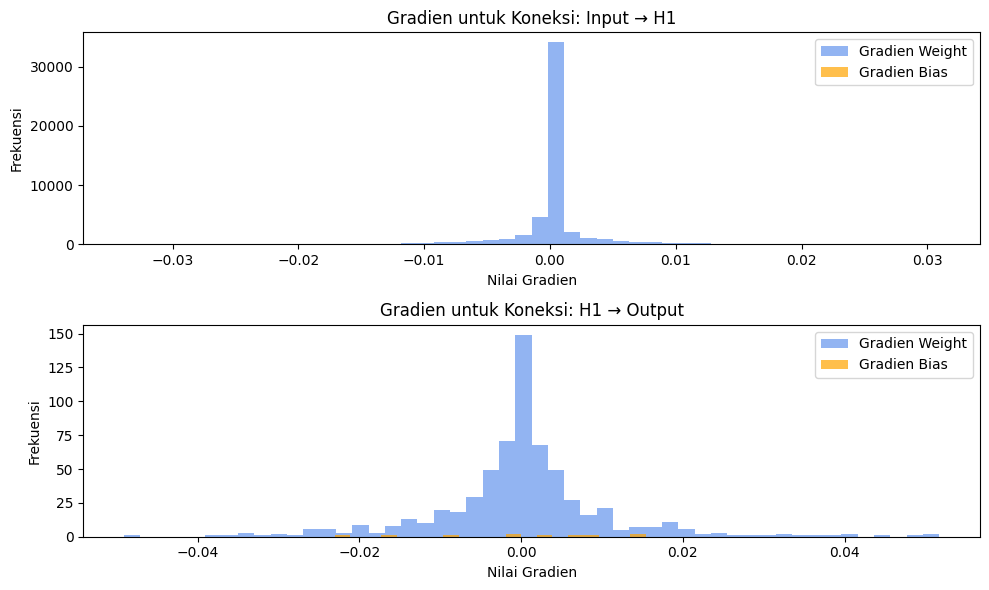

In [13]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()